In [9]:
import os
import sys
import torch
import numpy as np
import cv2
import cProfile

sys.path.append('/app/scripts/anikin/AI-58/')

from metadata_loader import MetadataLoader
from flux_dataset import FluxDataset
from regressor_on_resnet.nn_logging import Logger

from cloud_lib_v2.image_processing import *

from matplotlib import pyplot as plt
from matplotlib.colors import hsv_to_rgb

from torchvision.transforms import transforms


In [ ]:
logger = Logger(base_log_dir='/app/scripts/anikin/AI-58/regressor_on_resnet/euw_show_batch_log')

metadata_loader = MetadataLoader('./AI-58-config.json',
                                 radiation_threshold=10,
                                 split=(0.6, 0.2, 0.2),
                                 store_path=logger.misc_dir)

batch_size = 64
trainset = FluxDataset(flux_frame=metadata_loader.train,
                       batch_size=batch_size,
                       do_shuffle=True,
                       do_augment=True)

valset = FluxDataset(flux_frame=metadata_loader.validation,
                     batch_size=batch_size,
                     do_shuffle=False,
                     do_augment=False)

In [ ]:
imgs, flux = valset.__iter__().__next__()

In [ ]:
imgs, flux = trainset.__iter__().__next__()

In [ ]:
for dasio_i in os.listdir('/dasio'):
    dasio_i = os.path.join('/dasio', dasio_i)
    if os.path.isdir(dasio_i):
        dasio_i = os.path.join(dasio_i, 'masks')
        if os.path.isdir(dasio_i):
            for i in [1, 2]:
                mask_path = os.path.join(dasio_i, f'mask-id{i}.png')
                if os.path.exists(mask_path):
                    image = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
                    print(mask_path)
                    print('shape ', image.shape)
                    if len(image.shape) > 2:
                        for c in range(image.shape[2]):
                            print(image[:, :, c].max(), image[:, :, c].min())
                    else:
                        print(image.max(), image.min())
                    plt.imshow(image)
                    plt.show()
                else:
                    print(mask_path, 'not found')

In [ ]:
normalizator = transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
# invNormalize = transforms.Normalize((-0.485, -0.456, -0.406), (1/0.229, 1/0.224, 1/0.225))

invNormalize = transforms.Compose([ transforms.Normalize(mean = [ 0., 0., 0. ],
                                                     std = [ 1/0.229, 1/0.224, 1/0.225 ]),
                                transforms.Normalize(mean = [ -0.485, -0.456, -0.406 ],
                                                     std = [ 1., 1., 1. ]),
                               ])

In [ ]:
plt.imshow(imgs[2].permute(1, 2, 0))

In [ ]:
plt.imshow(invNormalize(imgs[2]).permute(1, 2, 0))

In [2]:
image = cv2.imread('/dasio/AI58/snapshots/snapshots-2021-08-18/img-2021-08-18T00-12-23devID2.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

(1920, 1920, 3)


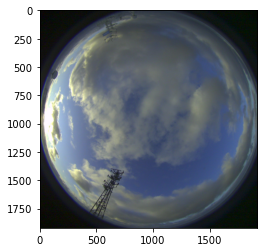

In [22]:
print(image.shape)
plt.imshow(image)

(1920, 1920)


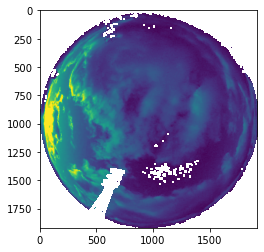

In [25]:
masked = np.ma.masked_less(image[:, :, 0], 50)
print(masked.shape)
plt.imshow(masked)